In [1]:
import pandas as pd  # linear algebra
import numpy as np # data processing



# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')


# Word cloud is a module used to show which words are the most frequent in the given text.
from wordcloud import WordCloud



# Remove the stop words
import nltk
from nltk.corpus import stopwords




# Skip Warning
import warnings
warnings.filterwarnings('ignore')

**load dataset**

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# as my machine not able to handle that much rows so i am taking sample of 2000 rows
# we take 2000 rows from our data to work
df= df.sample(2000)

In [4]:
# shape of our data now
df.shape

(2000, 2)

###  Summary Information about Dataset

In [5]:
print(f'> Shape: {df.shape}\n')
print(f'> Columns: {df.columns.values}\n')
print(f'> Info:')
print(df.info())
print()
print(f'> Description:')
df.describe().T

> Shape: (2000, 2)

> Columns: ['review' 'sentiment']

> Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 12072 to 49657
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     2000 non-null   object
 1   sentiment  2000 non-null   object
dtypes: object(2)
memory usage: 46.9+ KB
None

> Description:


,count,unique,top,freq
review,2000,2000,"I just saw this at the Toronto Film Festival, ...",1
sentiment,2000,2,positive,1006


In [6]:
summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
summary['missing'] = df.isna().sum()
summary['%missing']  = (df.isna().sum())/len(df)
summary['uniques'] = df.nunique().values
summary['count'] = df.count().values

In [7]:
summary.style.background_gradient(cmap='Blues')

,dtypes,missing,%missing,uniques,count
review,object,0,0.000000,2000,2000
sentiment,object,0,0.000000,2,2000


In [8]:
# there is some duplicated rows so no need to drop
df.duplicated().sum()

0

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
# one review 
df['review'].values[0]

'I just saw this at the Toronto Film Festival, and I hope it gets wide release because I want to see it again! It is a character-driven film, and Andrew and David are more than up to the task. Any discussion of the plot might be<br /><br />considered spoilers, so I\'ll just say that the storyline is clever, the acting is superb, and the effects are amazing. Well-filmed and well-paced too. One of the best films I have seen in ages, and very refreshing in this summer of dreary<br /><br />movies. It had the audience laughing the whole time. See it if you can. (I particularly liked the "Candy bar! Candy bar!" scene.)'

# Univariate and Bivariate Analysis

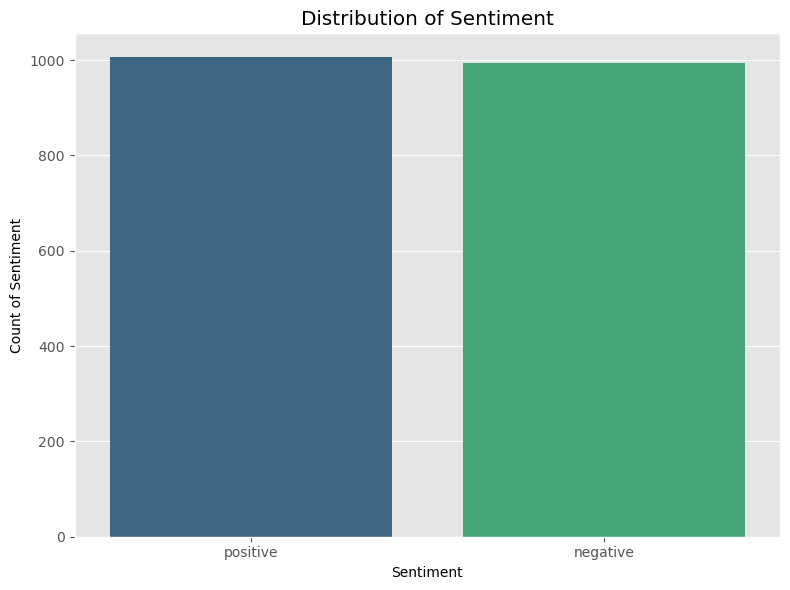

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count of Sentiment')
plt.tight_layout()
plt.show()

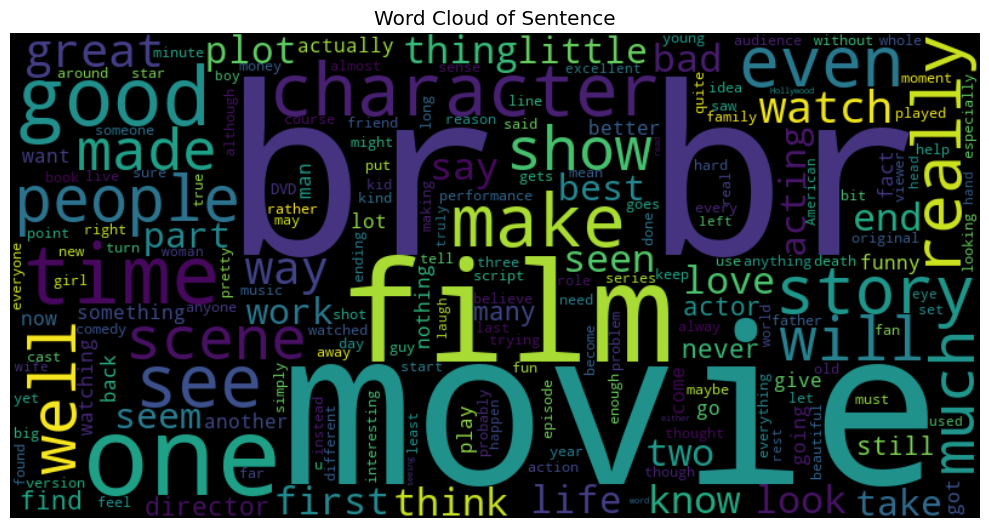

In [12]:
text = ' '.join(df['review'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Sentence')
plt.tight_layout()
plt.show()

### as we can see there are some html tags in our sample review so we try to remove it

## Text Cleaning


* Remove html tags
* Remove special characters
* Converting every thing to lower case
* Removing Stop words
* Stemming

In [13]:
# we have encoded our target column
df['sentiment'].replace({'positive':1,'negative':0},inplace=True)

In [14]:
df.head()

,review,sentiment
12072,"I just saw this at the Toronto Film Festival, ...",1
42392,"This is complete and absolute garbage, a fine ...",0
3223,I cannot believe I actually sat through the wh...,0
20882,"Awful! Awful! Awful! Drab, unimaginative, pred...",0
33502,John has made two One man shows. Spic O Rama a...,1


In [15]:
# as we can we have removed almost all extra html tags
# lets make a function for it
import re
clean = re.compile('<.*?>')
re.sub(clean, '', df.iloc[2].review)

"I cannot believe I actually sat through the whole of this movie! It was absolutely awful, and totally cringe-worthy, and yet I sat through it thinking it had to get better. It didn't, and I have wasted 2 hours of my life. Will Smith is much better in action movies - I loved him in I, Robot, Enemy of the State and Independence Day - and I don't think he can really be expected to carry off an entire movie as the romantic lead in the way that Cary Grant could. Then again, the script was unbearably awful, and the dialogue was so cheesy. I disliked everyone except for Albert's character, and even that I found was done with a heavy hand. If you want to watch a modern feel-good romantic comedy, watch something like How To Lose A Guy In Ten Days, or When Harry Met Sally. The 40 Year Old Virgin left me with a smile on my face. I even preferred Music and Lyrics above this - and yes, I know it's cheesy, but at least it didn't take itself seriously, and was sweet. I also disliked the main female 

In [16]:
def clean_text(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [17]:
# text has cleaned now
df['review'] = df['review'].apply(clean_text)

In [18]:
# converting everything to lower

def text_lower(text):
    return text.lower()

In [19]:
df['review']= df['review'].apply(text_lower)

In [20]:
# function to remove special characters

def remove_special(text):
    x=''
    
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x=x + ' '
    return x

In [21]:
remove_special('helo# world ,i am here ')

'helo  world  i am here '

In [22]:
df['review'] = df['review'].apply(remove_special)

In [23]:
# Remove the stop words
import nltk

In [24]:
from nltk.corpus import stopwords

In [25]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
def remove_stopwords(text):
    x=[]
    for i in text.split():
        
        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y

In [27]:
df['review'] = df['review'].apply(remove_stopwords)

In [28]:
df

,review,sentiment
12072,"[saw, toronto, film, festival, hope, gets, wid...",1
42392,"[complete, absolute, garbage, fine, example, b...",0
3223,"[cannot, believe, actually, sat, whole, movie,...",0
20882,"[awful, awful, awful, drab, unimaginative, pre...",0
33502,"[john, made, two, one, man, shows, spic, rama,...",1
...,...,...
38726,"[went, see, finnish, film, got, say, one, bett...",1
46770,"[channel, surfing, found, movie, promising, sy...",0
2858,"[film, little, recommend, though, little, brea...",0
9807,"[frank, capra, wonders, life, film, keeping, b...",1


In [29]:
# Perform stemming

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [30]:
y=[]
def stem_words(text):
    for i in text:
        y.append(ps.stem(i))
    z=y[:]
    y.clear()
    return z

In [31]:
df['review']= df['review'].apply(stem_words)

In [32]:
df['review'].values[0]

['saw',
 'toronto',
 'film',
 'festiv',
 'hope',
 'get',
 'wide',
 'releas',
 'want',
 'see',
 'charact',
 'driven',
 'film',
 'andrew',
 'david',
 'task',
 'discuss',
 'plot',
 'might',
 'beconsid',
 'spoiler',
 'say',
 'storylin',
 'clever',
 'act',
 'superb',
 'effect',
 'amaz',
 'well',
 'film',
 'well',
 'pace',
 'one',
 'best',
 'film',
 'seen',
 'age',
 'refresh',
 'summer',
 'drearymovi',
 'audienc',
 'laugh',
 'whole',
 'time',
 'see',
 'particularli',
 'like',
 'candi',
 'bar',
 'candi',
 'bar',
 'scene']

In [33]:
# Join back

def join_back(list_input):
    return " ".join(list_input)
    

In [34]:
df['review']=df['review'].apply(join_back)

In [35]:
df['review'].values[0]

'saw toronto film festiv hope get wide releas want see charact driven film andrew david task discuss plot might beconsid spoiler say storylin clever act superb effect amaz well film well pace one best film seen age refresh summer drearymovi audienc laugh whole time see particularli like candi bar candi bar scene'

In [36]:
X=df.iloc[:,0:1].values

In [37]:
X.shape

(2000, 1)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500)


In [39]:
X=cv.fit_transform(df['review']).toarray()

In [40]:
X.shape

(2000, 2500)

In [41]:
X[0].mean()

0.0192

In [42]:
y=df.iloc[:,-1].values

In [43]:
y.shape

(2000,)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
xtrain,xtest,ytrain,ytest= train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [47]:
clf = GaussianNB()
clf1 = BernoulliNB()
clf2= MultinomialNB()

In [48]:
clf.fit(xtrain,ytrain)
clf1.fit(xtrain,ytrain)
clf2.fit(xtrain,ytrain)

MultinomialNB()

In [49]:
pred = clf.predict(xtest)
pred1 = clf1.predict(xtest)
pred2 =clf2.predict(xtest)

In [50]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [51]:
print('Gussian',accuracy_score(ytest,pred))
print('Bernauli',accuracy_score(ytest,pred1))
print('Multinomial',accuracy_score(ytest,pred2))

Gussian 0.72
Bernauli 0.85
Multinomial 0.825


In [52]:
print('Gussian',confusion_matrix(ytest,pred))
print('Bernauli',confusion_matrix(ytest,pred1))
print('Multinomial',confusion_matrix(ytest,pred2))

Gussian [[159  42]
 [ 70 129]]
Bernauli [[170  31]
 [ 29 170]]
Multinomial [[164  37]
 [ 33 166]]


In [53]:
print('Gussian',classification_report(ytest,pred))
print('Bernauli',classification_report(ytest,pred1))
print('Multinomial',classification_report(ytest,pred2))

Gussian               precision    recall  f1-score   support

           0       0.69      0.79      0.74       201
           1       0.75      0.65      0.70       199

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400

Bernauli               precision    recall  f1-score   support

           0       0.85      0.85      0.85       201
           1       0.85      0.85      0.85       199

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

Multinomial               precision    recall  f1-score   support

           0       0.83      0.82      0.82       201
           1       0.82      0.83      0.83       199

    accuracy                           0.82       400
   macro avg       0.83      0.83      0.82       400
weighted avg       0.83      0.82      0.82  

In [54]:
# as we can see our Bernauli Naive bayes performing well on our Data
# its recall,precision,accuracy all good so we can go with this model